# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
# 检查数据维度
data.shape

(150000, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06948590243537403

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [6]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
#将数据且分成70%训练集，30%测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=0)

#查看数据维度
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((84188, 10), (36081, 10), (84188,), (36081,))

<AxesSubplot:>

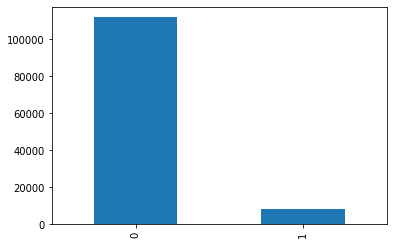

In [7]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
data['SeriousDlqin2yrs'].value_counts().plot(kind='bar')

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')



#### 2.数据预处理之离散化

In [8]:
import numpy as np
import pandas as pd

In [9]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
np.max(data.age),np.min(data.age)

(103, 0)

In [10]:
data.age=pd.cut(data.age,34)

In [11]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,"(42.412, 45.441]",2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,"(39.382, 42.412]",0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,"(36.353, 39.382]",1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,"(27.265, 30.294]",0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,"(48.471, 51.5]",1,0.024926,63588.0,7,0,1,0,0.0


#### 3.数据预处理之独热向量编码

In [12]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
age=pd.get_dummies(data,columns=['age'],prefix_sep='_',dummy_na=False,drop_first=False)
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,"(42.412, 45.441]",2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,"(39.382, 42.412]",0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,"(36.353, 39.382]",1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,"(27.265, 30.294]",0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,"(48.471, 51.5]",1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.385742,"(48.471, 51.5]",0,0.404293,3400.0,7,0,0,0,0.0
149996,0,0.040674,"(72.706, 75.735]",0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,"(42.412, 45.441]",0,0.716562,5584.0,4,0,1,0,2.0
149999,0,0.000000,"(27.265, 30.294]",0,0.000000,5716.0,4,0,0,0,0.0


#### 4.数据预处理之幅度缩放

In [13]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_test_std=stdsc.transform(X_test)
X_train_std.shape

(84188, 10)

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [14]:
# 提示：fit建模，建完模之后可以取出coef属性
#lr建模
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1000,random_state=0)
lr.fit(X_train_std,y_train)
lr_score=lr.score(X_train_std,y_train)
print('lr accuracy:',lr_score)

#返回系数
feat_labels=data.columns[1:]
coefs=lr.coef_
indices=np.argsort(coefs[0])[::-1]

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f'%(f,30,feat_labels[indices[f]],coefs[0,indices[f]]))

lr accuracy: 0.9313085000237563
 0) NumberOfTime30-59DaysPastDueNotWorse 1.755218
 1) NumberOfTimes90DaysLate        1.462014
 2) NumberOfDependents             0.105471
 3) NumberRealEstateLoansOrLines   0.101693
 4) RevolvingUtilizationOfUnsecuredLines -0.013258
 5) NumberOfOpenCreditLinesAndLoans -0.028007
 6) DebtRatio                      -0.062592
 7) age                            -0.372708
 8) MonthlyIncome                  -0.595898
 9) NumberOfTime60-89DaysPastDueNotWorse -3.056433


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [15]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


param_grid={'C':[1,10,100,500],'penalty':['l1','l2']}
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.score(X_test,y_test)



/home/jing/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/jing/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/home/jing/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/jing/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

0.9299354230758571

In [16]:
# 输出最好的超参数
# 输出最好的模型
best_params=grid_search.best_params_ #最优参数
best_score=grid_search.best_score_ #交叉验证的平均精度
best_estimator=grid_search.best_estimator_ #最佳参数对应的模型
results=pd.DataFrame(grid_search.cv_results_)
print("best parameter ",best_params)
print('best score ',best_score)
print('beet estimator ',best_estimator)

best parameter  {'C': 1, 'penalty': 'l2'}
best score  0.9310115449656712
beet estimator  LogisticRegression(C=1)


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

/home/jing/snap/jupyter/common/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


查准率： [0.92981873 0.33333333]
召回率： 0.5001675863577526
auc: 0.5001675863577526
f1: [0.65044705 0.40005362]


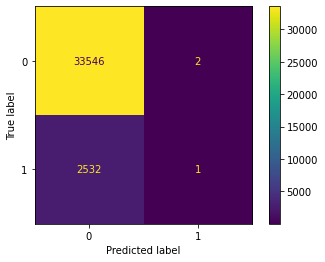

In [17]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
y_pred=lr.predict(X_test) #测试集上预测

#混淆矩阵
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

#查准率
precision = np.diag(cm) / np.sum(cm, axis=0)
print('查准率：',precision)

#recall
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average='macro')
print('召回率：',recall)

#auc
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred)
print('auc:',auc_score)

#f1值
f1_score = 2*precision*recall / (precision+recall)
print('f1:',f1_score)

#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [23]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_prob1=lr.predict_proba(X_test_std)[:,1]
y_pred_class1 = binarize(y_pred_prob.reshape(-1, 1), threshold=0.3)[:,0]

# print the 10 predicted probabilities
print(y_pred_prob1[60:70])



[0.04832772 0.04460587 0.03618867 0.08941146 0.03609656 0.09803942
 0.0614803  0.13045384 0.04361316 0.02657149]


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [62]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

#基于树模型进行特征选择与重要性排序
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, 
                              random_state=0)
feat_labels=data.columns[1:]
tree.fit(X_train,y_train)
#评分
score=tree.score(X_test,y_test)
print('score:',score)

score: 0.9310440397993404


In [63]:
#特征重要度
importance=tree.feature_importances_

indices=np.argsort(importance)[::-1]
for f in range(X_train.shape[1]):
    print('{:<5}{:<40} {}'.format(f+1,feat_labels[indices[f]],importance[indices[f]]))

1    NumberOfTimes90DaysLate                  0.3599274668866285
2    RevolvingUtilizationOfUnsecuredLines     0.2507657518081217
3    NumberOfTime30-59DaysPastDueNotWorse     0.11085423926604313
4    DebtRatio                                0.07015044001497316
5    MonthlyIncome                            0.05499048501060877
6    NumberOfTime60-89DaysPastDueNotWorse     0.052881411941181386
7    age                                      0.04398781355839977
8    NumberOfOpenCreditLinesAndLoans          0.034584010405472
9    NumberRealEstateLoansOrLines             0.01242152827239573
10   NumberOfDependents                       0.009436852836175898


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [68]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
#建模
feat_labels1=data.columns[1:]
forest = RandomForestClassifier(criterion='entropy', 
                                n_estimators=100, # The number of trees in the forest.
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train,y_train)
#评分
score1=forest.score(X_test,y_test)
print('score:',score1)
importance1=forest.feature_importances_
#array([0.21198461, 0.1214638 , 0.06256157, 0.16511804, 0.15371971,
#      0.08684493, 0.08136664, 0.03464814, 0.04108851, 0.04120405])

indices1=np.argsort(importance)[::-1]
for f in range(X_train.shape[1]):
    print('{:<5}{:<40} {}'.format(f+1,feat_labels1[indices1[f]],importance1[indices1[f]]))

score: 0.9326238186303041
1    NumberOfTimes90DaysLate                  0.081366640946576
2    RevolvingUtilizationOfUnsecuredLines     0.21198460733213914
3    NumberOfTime30-59DaysPastDueNotWorse     0.06256156808413504
4    DebtRatio                                0.1651180390926724
5    MonthlyIncome                            0.15371971469407786
6    NumberOfTime60-89DaysPastDueNotWorse     0.04108851386823791
7    age                                      0.12146379810147277
8    NumberOfOpenCreditLinesAndLoans          0.08684493015558296
9    NumberRealEstateLoansOrLines             0.03464813627808444
10   NumberOfDependents                       0.04120405144702151


In [72]:
# 支持向量机
from sklearn.svm import SVC
#建模
feat_labels2=data.columns[1:]
svm=SVC(kernel='linear',C=1.0,random_state=0,
        class_weight='balanced',max_iter=100000)
svm.fit(X_train,y_train)
#评分
score2=svm.score(X_test,y_test)
print('score:',score2)
coefs2=lr.coef_
indices2=np.argsort(coefs[0])[::-1]

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f'%(f,30,feat_labels2[indices2[f]],coefs2[0,indices2[f]]))



/home/jing/snap/jupyter/common/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


score: 0.9205121809262493
 0) NumberOfTime30-59DaysPastDueNotWorse 1.755218
 1) NumberOfTimes90DaysLate        1.462014
 2) NumberOfDependents             0.105471
 3) NumberRealEstateLoansOrLines   0.101693
 4) RevolvingUtilizationOfUnsecuredLines -0.013258
 5) NumberOfOpenCreditLinesAndLoans -0.028007
 6) DebtRatio                      -0.062592
 7) age                            -0.372708
 8) MonthlyIncome                  -0.595898
 9) NumberOfTime60-89DaysPastDueNotWorse -3.056433


In [76]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)
feat_labels3=data.columns[1:]
#对分类进行评分
score3=knn.score(X_train,y_train)

print('score:',score3)
coefs3=lr.coef_
indices3=np.argsort(coefs[0])[::-1]

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f'%(f,30,feat_labels3[indices3[f]],coefs3[0,indices3[f]]))

score: 0.9336366227965981
 0) NumberOfTime30-59DaysPastDueNotWorse 1.755218
 1) NumberOfTimes90DaysLate        1.462014
 2) NumberOfDependents             0.105471
 3) NumberRealEstateLoansOrLines   0.101693
 4) RevolvingUtilizationOfUnsecuredLines -0.013258
 5) NumberOfOpenCreditLinesAndLoans -0.028007
 6) DebtRatio                      -0.062592
 7) age                            -0.372708
 8) MonthlyIncome                  -0.595898
 9) NumberOfTime60-89DaysPastDueNotWorse -3.056433
